# EDA & Preprocessing

## EDA

### Import package

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
plt.rcParams['font.family'] = 'NanumGothic'

### Function

In [96]:
# 데이터 검증 : data1과 data2에 있는 가수 정보가 서로 포함되어 있는지 확인
def check_artist(data1, data2):
    artist = list(data1['Artist'])
    for idx in artist:
        if idx not in set(data2['Artist']):
            print(idx)

def artist_num(data1, data2):
    if len(data1['Artist'].value_counts()) == len(data2['Artist'].value_counts()):
        print("가수 정보가 일치합니다")
    else:
        print("누락된 가수 정보를 검색합니다")
        check_artist(data1, data2)
        check_artist(data2, data1)

In [171]:
# 데이터 그룹 분포 시각화
def data_distribution(data, feature, count_num):
    
    if feature == 'Genre':
        new_rows = []
        for _, row in data.iterrows():
            genres = row[feature].split()
            for genre in genres:
                new_rows.append({feature: genre})

        data = pd.DataFrame(new_rows)
        
    counts = data[feature].value_counts()

    # 데이터를 개씩 끊어서 여러 그래프로 표현
    num_subplots = len(counts) // count_num

    # 전체 그래프 크기 설정
    plt.figure(figsize=(14, 6*num_subplots))

    for i in range(num_subplots):
        start_idx = i * count_num
        end_idx = (i + 1) * count_num
        
        # 하위 그래프 생성
        plt.subplot(num_subplots, 1, i + 1)

        # barplot 생성
        sns.barplot(x=counts.index[start_idx:end_idx], y=counts.values[start_idx:end_idx])

        # x축 라벨 회전
        plt.xticks(rotation=45, horizontalalignment='right')

        # 그래프 제목과 라벨 설정
        plt.title("Data distribution (Graph {})".format(i + 1))
        plt.xlabel("Data")
        plt.ylabel("Count")

        # 그래프 출력
        plt.tight_layout()

    # 모든 하위 그래프 출력
    plt.show()

In [150]:
# 음계 변환 함수
def convert_flat_to_sharp(note):
    flats = {"Ab": "G#", "Bb": "A#", "Db": "C#", "Eb": "D#", "Gb" : "F#"}
    
    for flat, sharp in flats.items():
        note = note.replace(flat, sharp)
    
    return note

# 주파수 변환 함수
def convert_to_frequency(row, table):
    # "Low"와 "High" 열의 값을 음계와 옥타브로 분할
    low_note = ''.join(filter(str.isalpha, row['Low']))
    low_octave = int(''.join(filter(str.isdigit, row['Low'])))
    
    high_note = ''.join(filter(str.isalpha, row['High']))
    high_octave = int(''.join(filter(str.isdigit, row['High'])))
    
    low_note = convert_flat_to_sharp(low_note)
    high_note = convert_flat_to_sharp(high_note)

    # octave_table에서 노트에 해당하는 주파수 값을 찾아서 반환
    low_frequency = table[low_note][low_octave]
    high_frequency = table[high_note][high_octave]

    return low_frequency, high_frequency

### Load dataset

In [173]:
# 노래 정보(제목, 가수, 좋아요, 장르)
datafile = './data/data.csv'
column_names = ['Title', 'Artist', 'Rating', 'Genre']

# 음역대 정보(가수, 최저 음역대, 최고 음역대)
octavefile = './data/octave.csv'

# 음역대 별 주파수 정보
tablefile = './data/octave_table.csv'

In [174]:
# 데이터 불러오기 
df_singer = pd.read_csv(datafile, names=column_names)
df_octave = pd.read_csv(octavefile)
octave_table = pd.read_csv('./data/octave_table.csv')

### Data Visualization

#### Singer

In [97]:
# 가수 인원 확인
artist_num(df_singer, df_octave)

가수 정보가 일치합니다


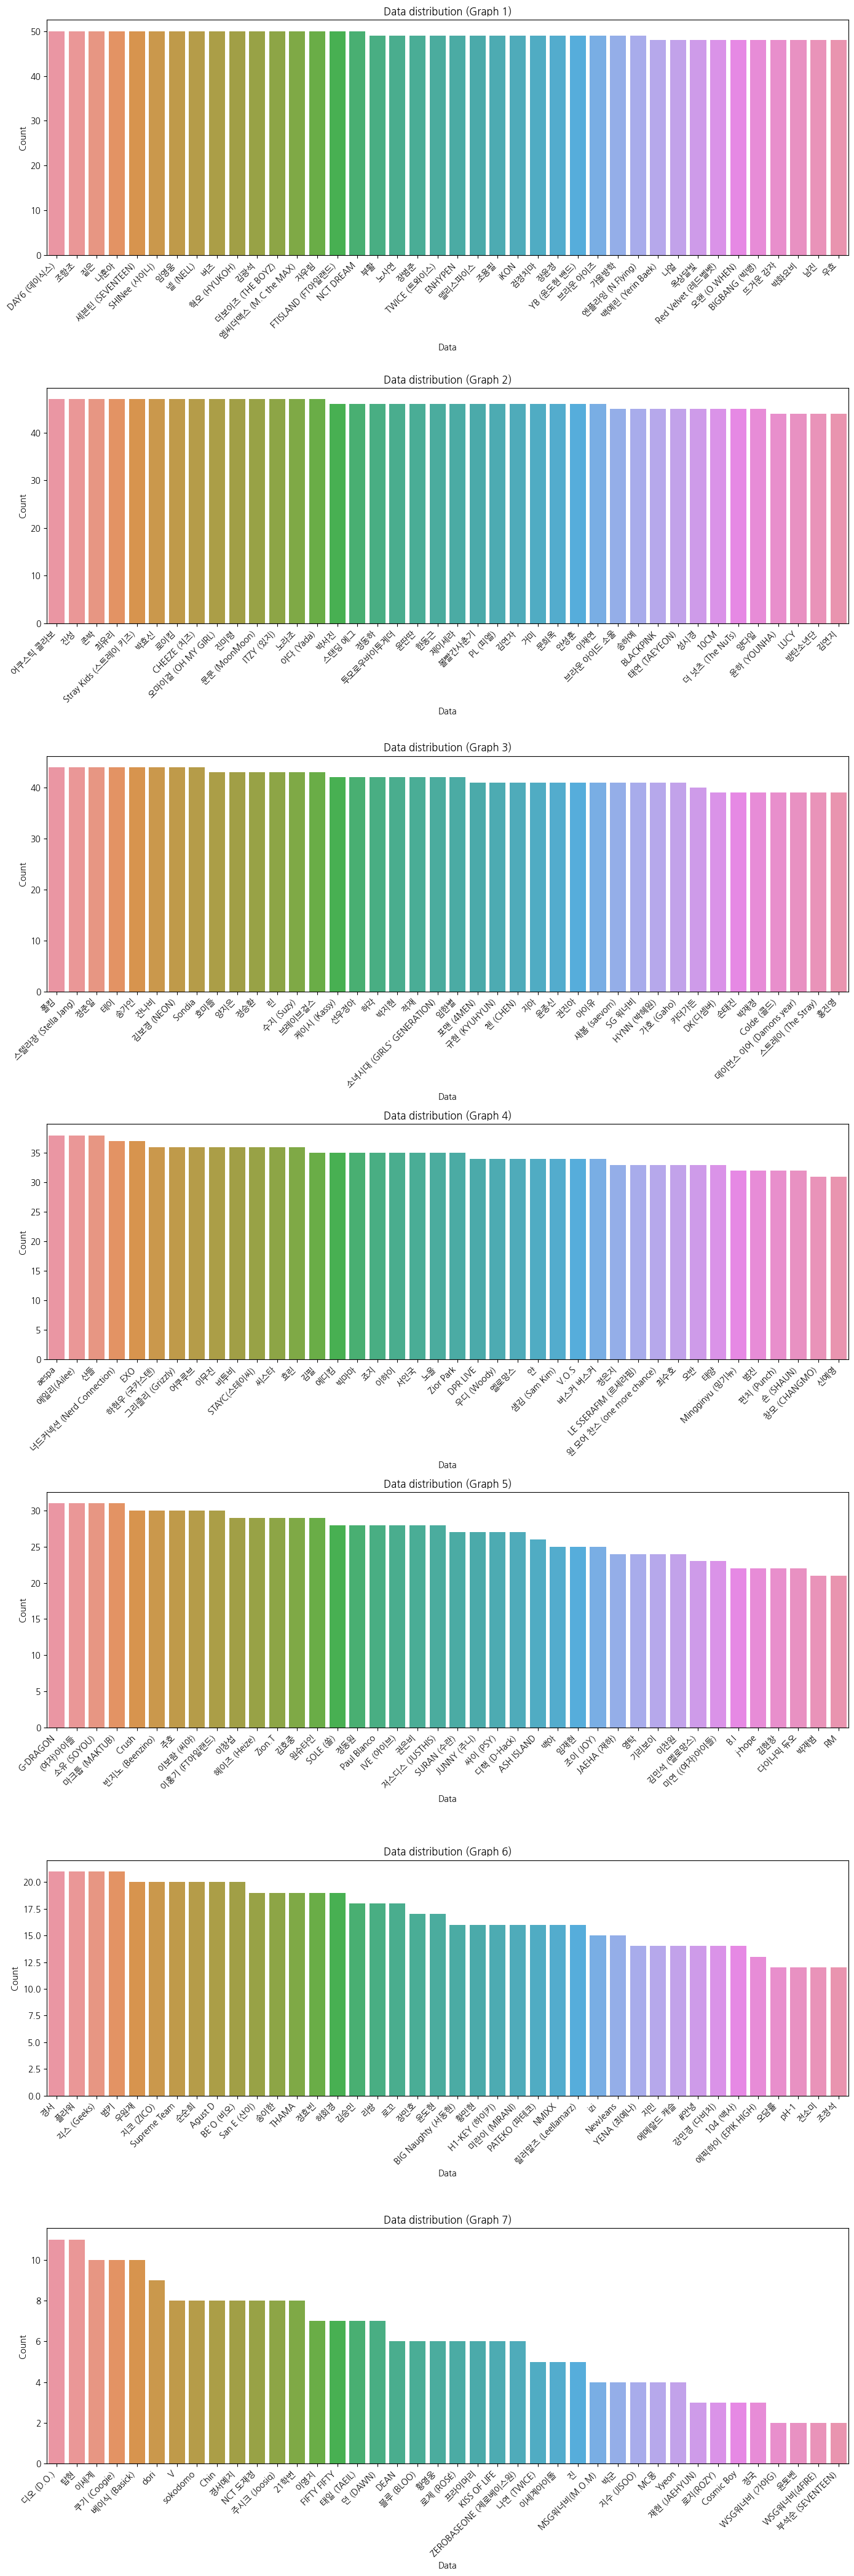

In [105]:
# 가수별 노래 개수 분포 
data_distribution(df_singer, 'Artist', 40)

In [158]:
# 인기 노래 정렬
df_singer.sort_values(by='Rating', ascending=False)[:10]

,Title,Artist,Rating,Genre
5521,봄날,방탄소년단,550574,랩/힙합
1634,밤편지,아이유,462165,발라드
5519,Dynamite,방탄소년단,458072,댄스
4921,모든 날 모든 순간 (Every day Every Moment),폴킴,427725,발라드 국내드라마
5563,주저하는 연인들을 위해,잔나비,394868,인디음악 록/메탈
5522,DNA,방탄소년단,374982,랩/힙합
4889,Way Back Home,숀 (SHAUN),363413,인디음악 일렉트로니카
486,좋니,윤종신,360033,발라드
1635,Blueming,아이유,356891,록/메탈
968,첫눈처럼 너에게 가겠다,에일리(Ailee),355527,발라드 국내드라마


#### Genres

In [160]:
# 선호도 고려를 위한 데이터프레임 생성
preference_list = ['Rating', 'Genre']
df_recommend = pd.DataFrame(df_singer[preference_list])
df_recommend

,Rating,Genre
0,9486,발라드 국내드라마
1,16419,록/메탈
2,63011,발라드
3,4052,발라드 국내드라마
4,14443,발라드
...,...,...
8833,3845,인디음악 록/메탈
8834,3083,발라드 인디음악
8835,3765,발라드 인디음악
8836,863,발라드 인디음악


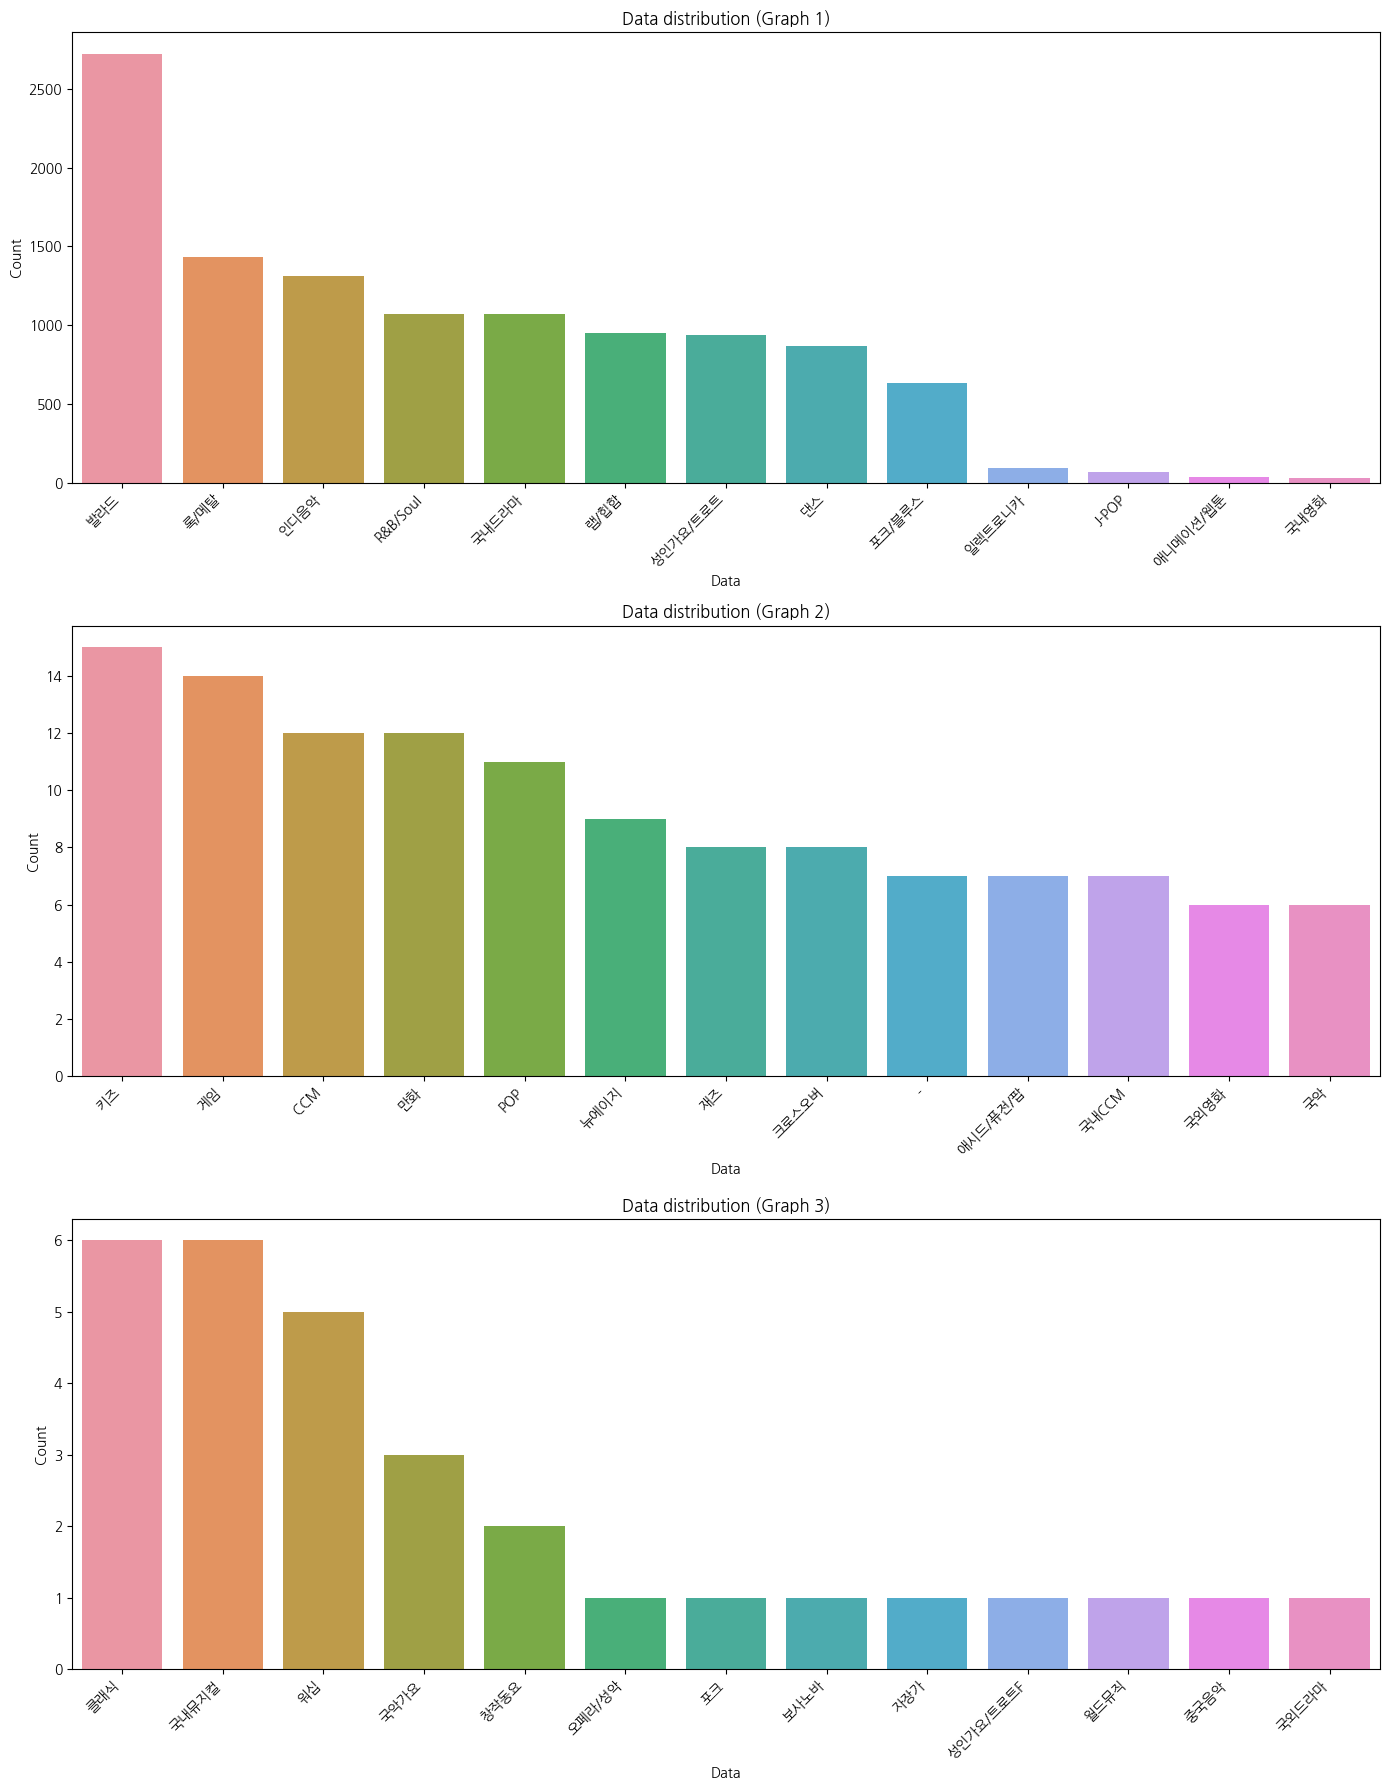

In [175]:
data_distribution(df_recommend, 'Genre', 13)

#### Octave

In [178]:
# 주파수 추가
df_octave['Frequency'] = df_octave.apply(convert_to_frequency, axis=1, args=(octave_table,))
df_octave

,Artist,Low,High,Frequency
0,이창섭,B2,D5,"(124, 587)"
1,안성훈,G3,G5,"(196, 784)"
2,이세계,E2,E4,"(82, 330)"
3,김승민,C2,C4,"(65, 262)"
4,남진,F2,F4,"(87, 349)"
...,...,...,...,...
276,진성,F2,C#5,"(87, 523)"
277,전소미,F1,G4,"(44, 392)"
278,서인국,G2,G#4,"(98, 392)"
279,오마이걸 (OH MY GIRL),E3,F5,"(165, 699)"


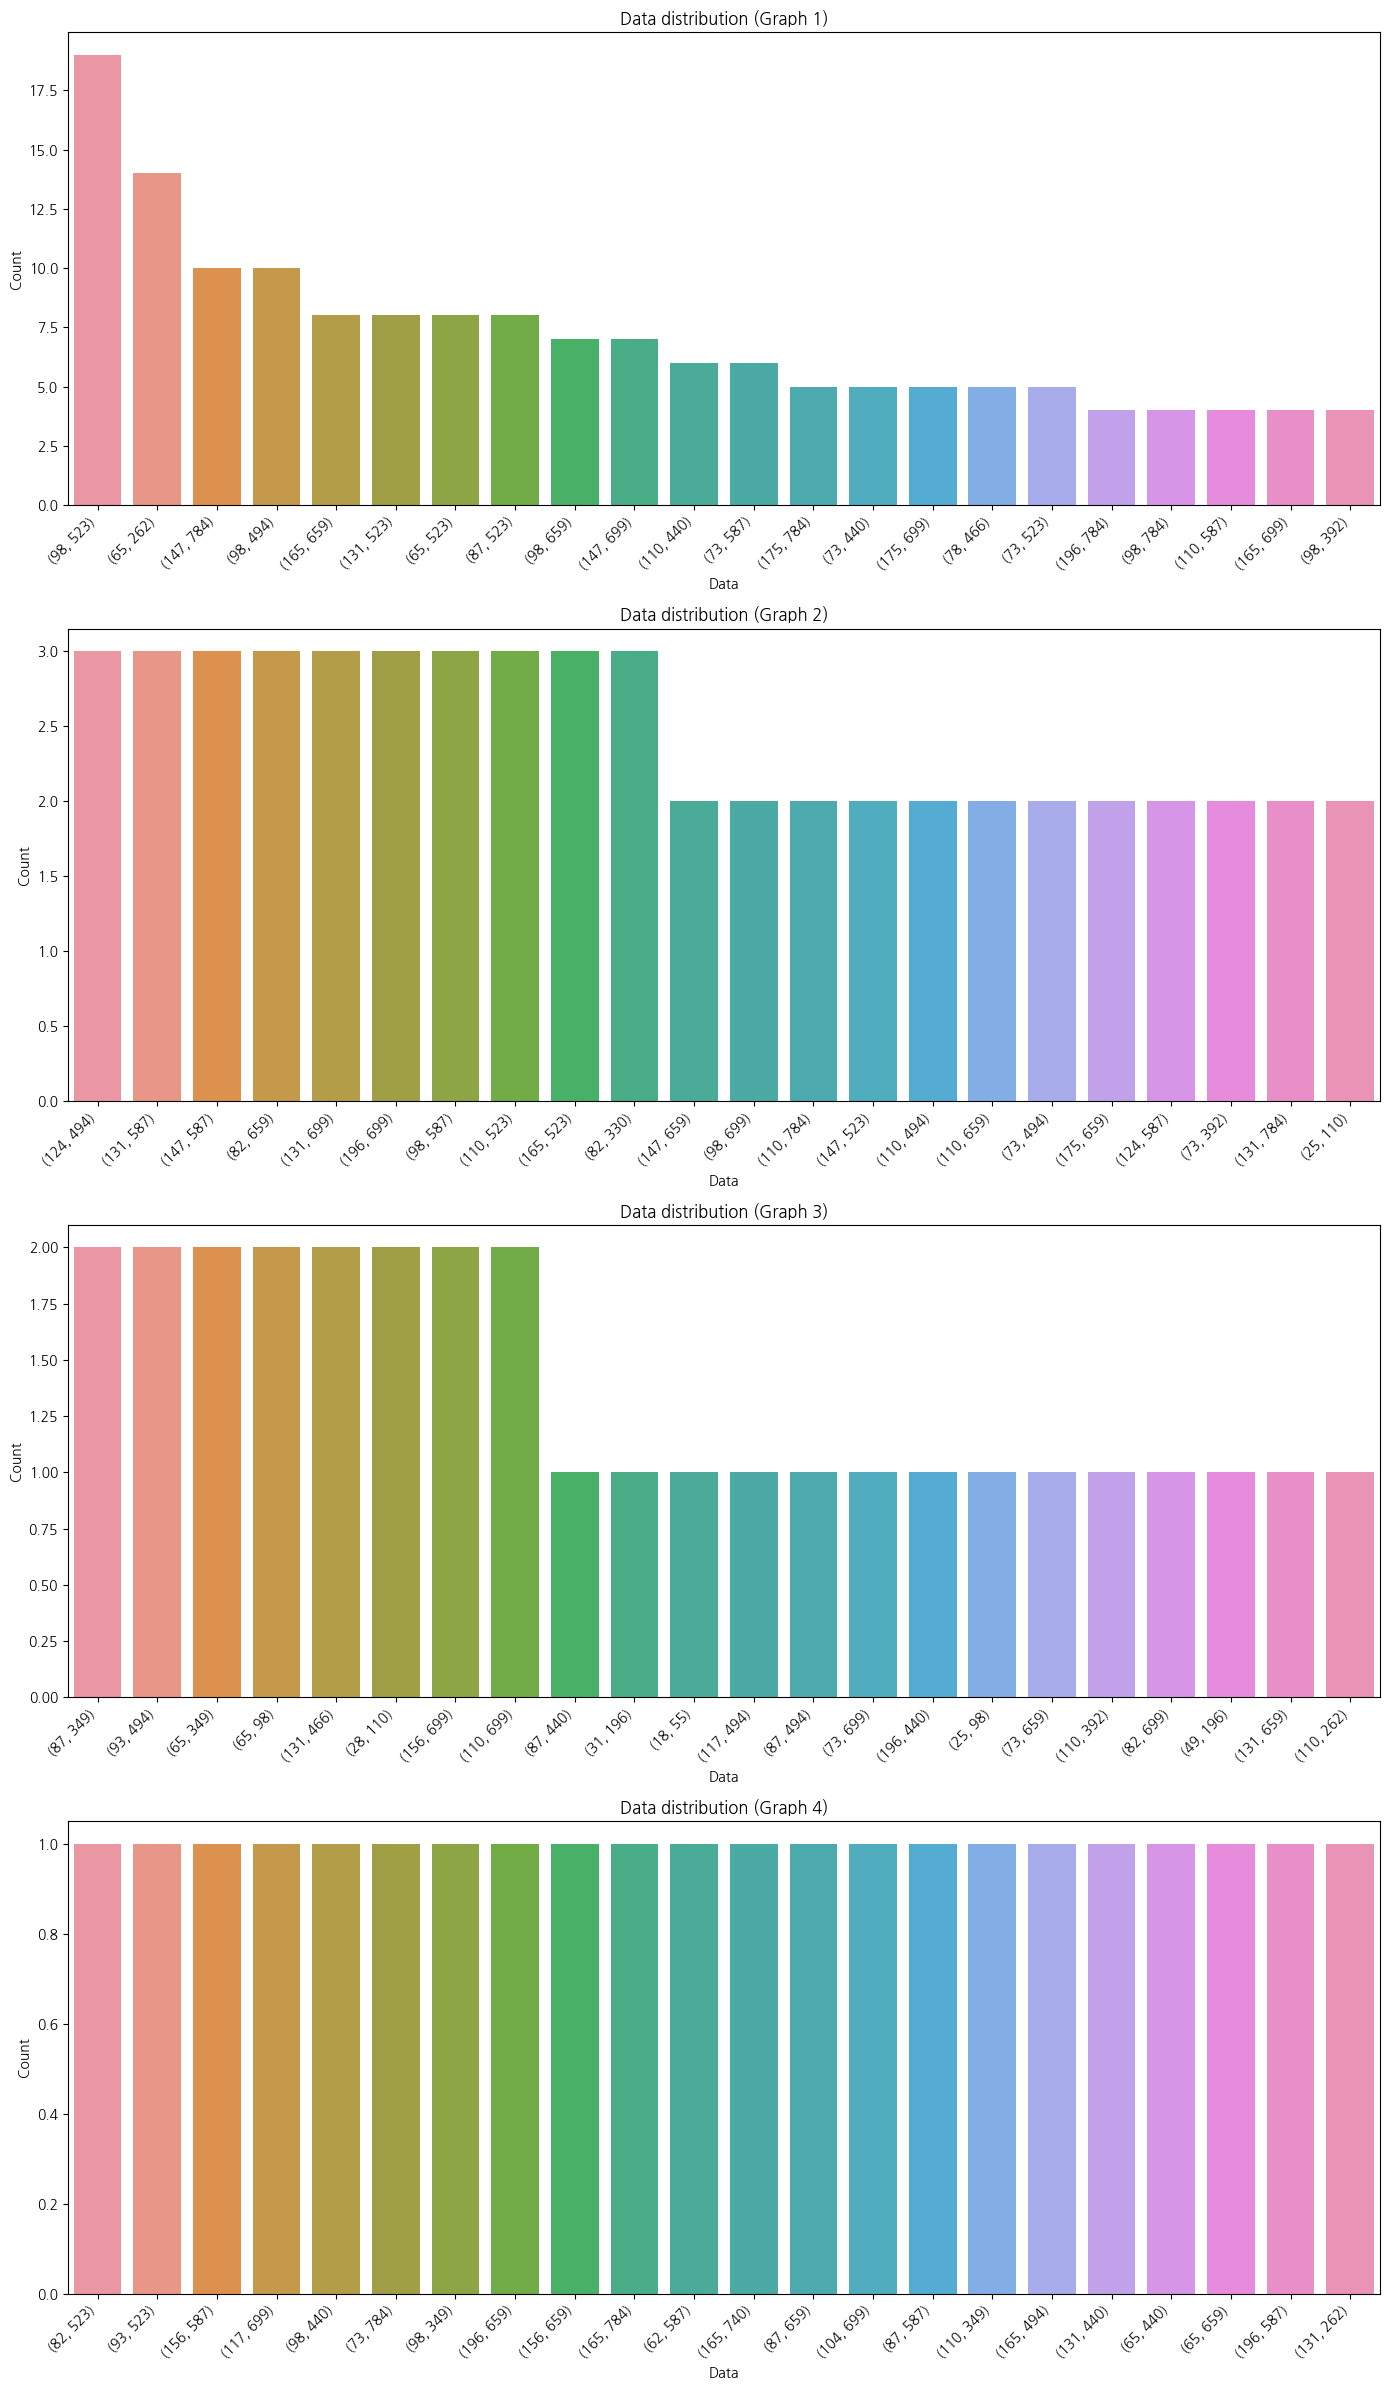

In [182]:
# 주파수 별 분포 확인
data_distribution(df_octave, 'Frequency', 22)

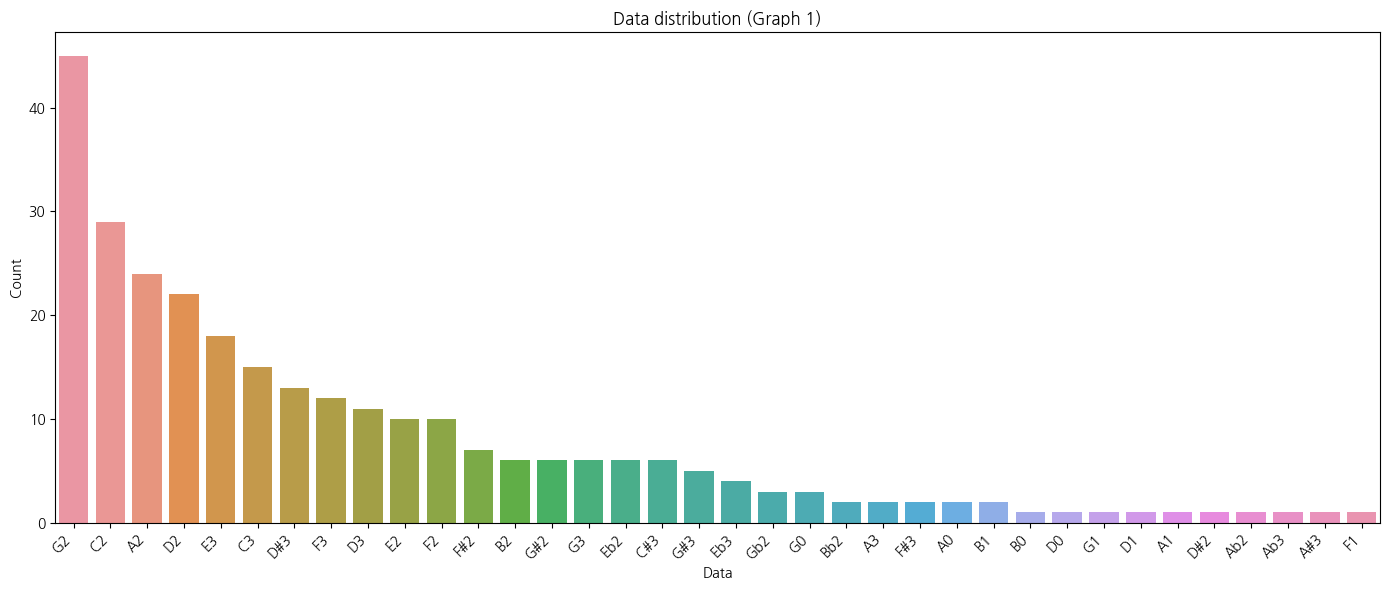

In [187]:
# 최저 음역대 분포 확인
data_distribution(df_octave, 'Low', 36)

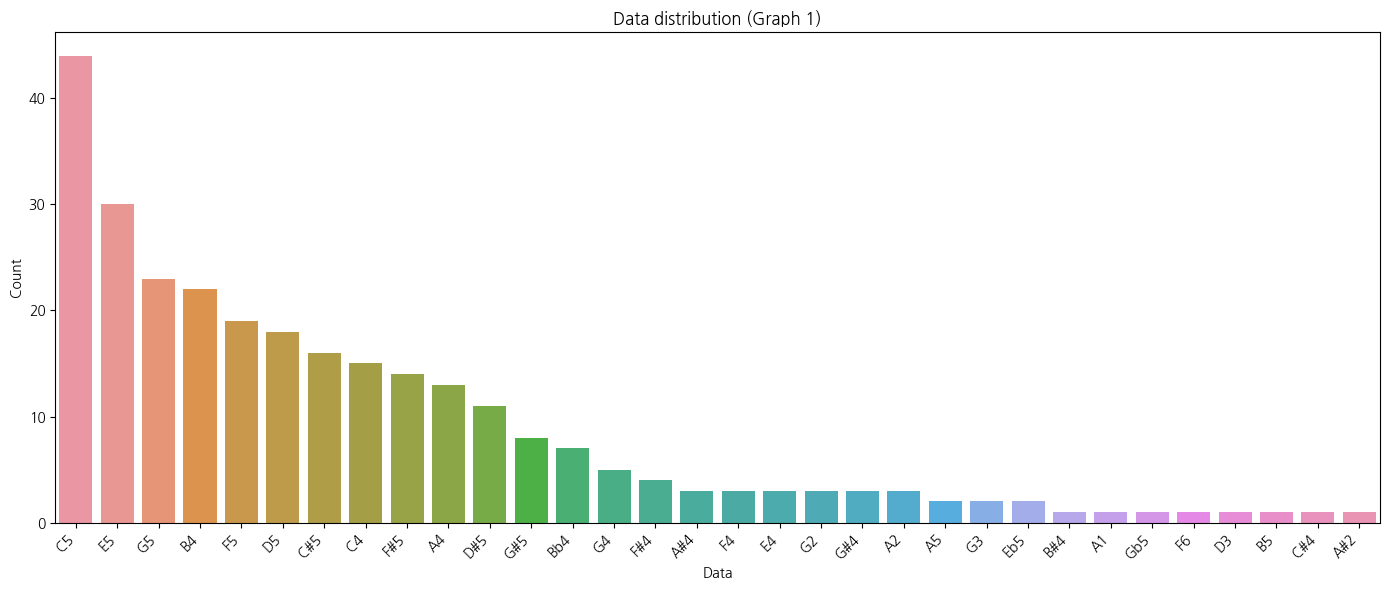

In [188]:
# 최고 음역대 분포 확인
data_distribution(df_octave, 'High', 32)

## Preprocessing

### Import package

In [190]:
import os
import subprocess
DATA_DIR = '/home/ckjwh/ckj/SongSSam/Remover/vocal-remover'

### Vocal Remover

In [191]:
def separate_audio(input_file, output_dir, gpu_id=0):
    # Build the command for separating audio
    command = [
        'python',
        '{DATA_DIR}/inference.py',
        '--input', input_file,
        '--tta',
        '--gpu', str(gpu_id),
        '--output_dir', output_dir
    ]

    # Run the command
    subprocess.run(command)

def separate_audio_in_folder(input_folder, output_dir, gpu_id=0):
    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # List all audio files in the input folder
    audio_files = [f for f in os.listdir(input_folder) if f.endswith('.mp3')]  # Replace with the actual audio file extension

    for audio_file in audio_files:
        input_path = os.path.join(input_folder, audio_file)
        output_path = os.path.join(output_dir, audio_file)

        # Call the separate_audio function for each file in the folder
        separate_audio(input_path, output_path, gpu_id)

In [ ]:
# 파일 경로에 있는 mp3에서 보컬 및 MR 분리 
input_folder = '/home/ckjwh/ckj/SongSSam/Dataset/Song/Source1'  # Data folder path
output_folder = '/home/ckjwh/ckj/SongSSam/Dataset/Song/Preprocess'  # Output folder path
gpu_id = 0  

# separate_audio_in_folder(input_folder, output_folder, gpu_id)